Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


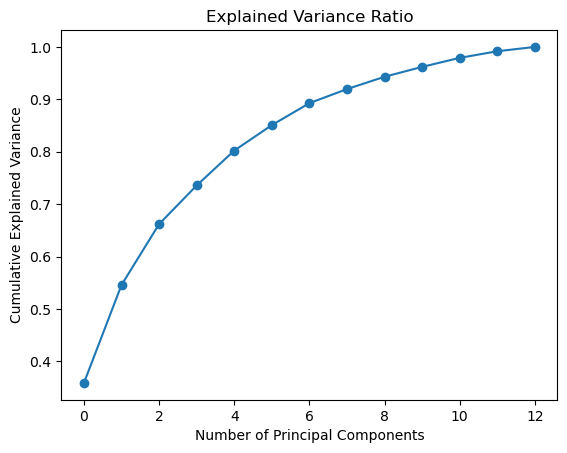

/tmp/ipykernel_3261/813749386.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis')


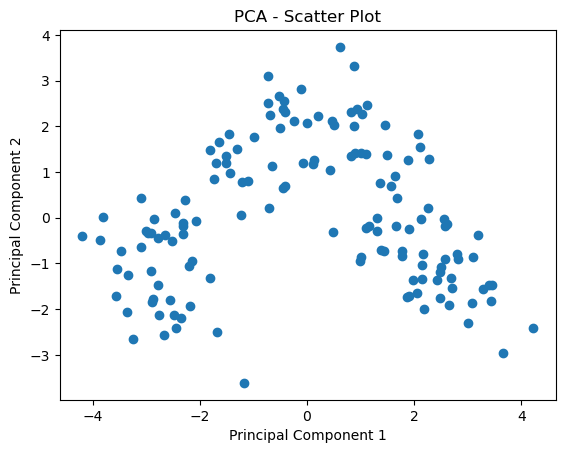

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset
# Please download the dataset from the UCI ML Repository and adjust the file path accordingly
# For example, using load_wine() from scikit-learn
wine = fetch_ucirepo(id=109) 
X =  wine.data.features
y =  wine.data.targets

# Split the dataset into features and target variables
# Assuming you want to use all features for PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing - Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Determine the optimal number of principal components based on explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance ratio
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Choose the number of components that capture a sufficient amount of variance (e.g., 95%)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Visualize the results of PCA using a scatter plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Scatter Plot')
plt.show()

# Perform clustering on the PCA-transformed data using K-Means
kmeans = KMeans(n_clusters=len(np.unique(y_train)), random_state=42)
kmeans.fit(X_train_pca)

# Interpret the results of PCA and clustering analysis
# You can analyze the clusters, inspect feature importance, and evaluate the performance as needed
